# Scikit learn


In [33]:
import sklearn
from sklearn.linear_model import Lasso, lasso_path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve, RocCurveDisplay

In [2]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer, load_iris

In [4]:
brca_data = load_breast_cancer()

In [5]:
X = brca_data["data"]
y = brca_data["target"]

In [6]:
X.shape

(569, 30)

In [7]:
brca_data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [8]:
import seaborn as sns

In [9]:
X_df = pd.DataFrame(data=X, columns=brca_data["feature_names"])
X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
#sns.pairplot(X_df)

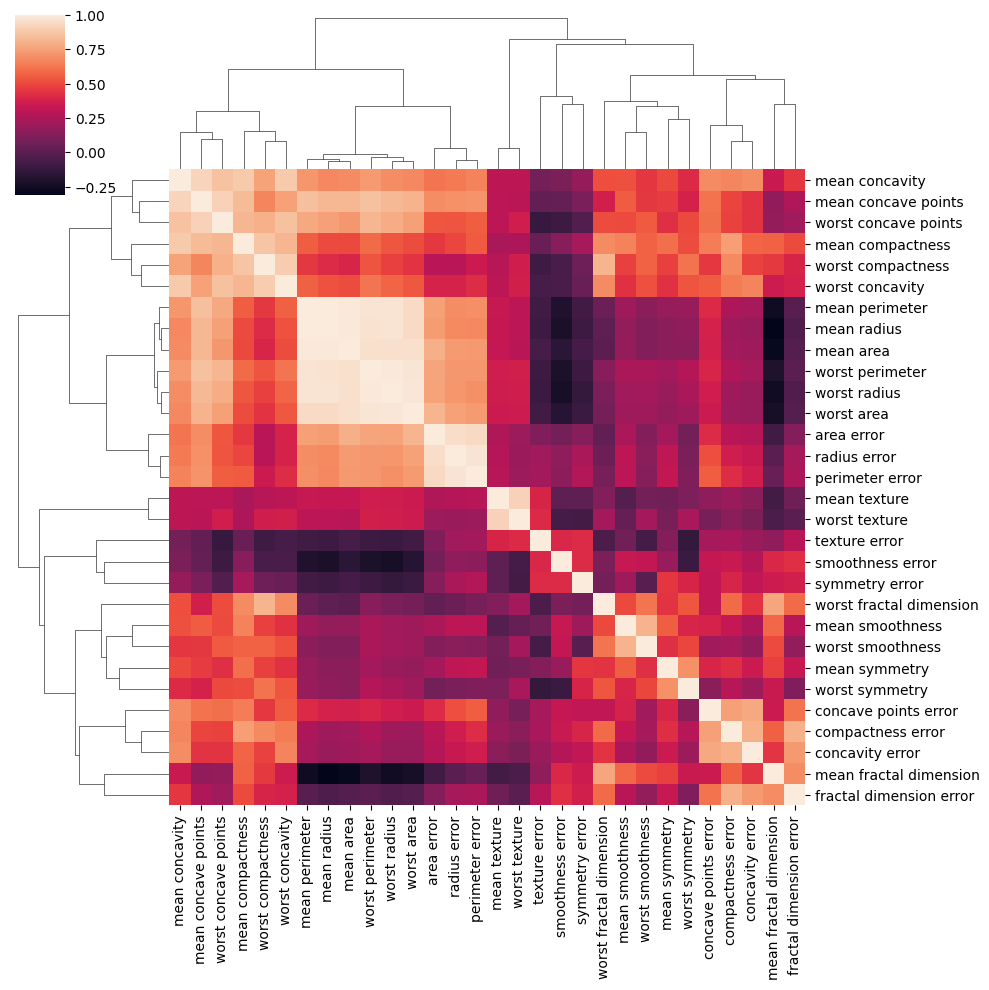

In [11]:
#
X_std = (X - X.mean(axis=0,keepdims=True))/X.std(axis=0,keepdims=True)

covar = np.dot(X_std.T,X_std)/(X_std.shape[0]-1)

# Panads make eaiser life for you
corr_df = X_df.corr()

sns.clustermap(corr_df)

In [12]:
X_df.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
mean compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
mean concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
mean concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
mean symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
mean fractal dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [13]:
X_df = X_df.drop(columns=["mean area","mean radius","worst perimeter","worst radius","worst area","radius error", "perimeter error"])

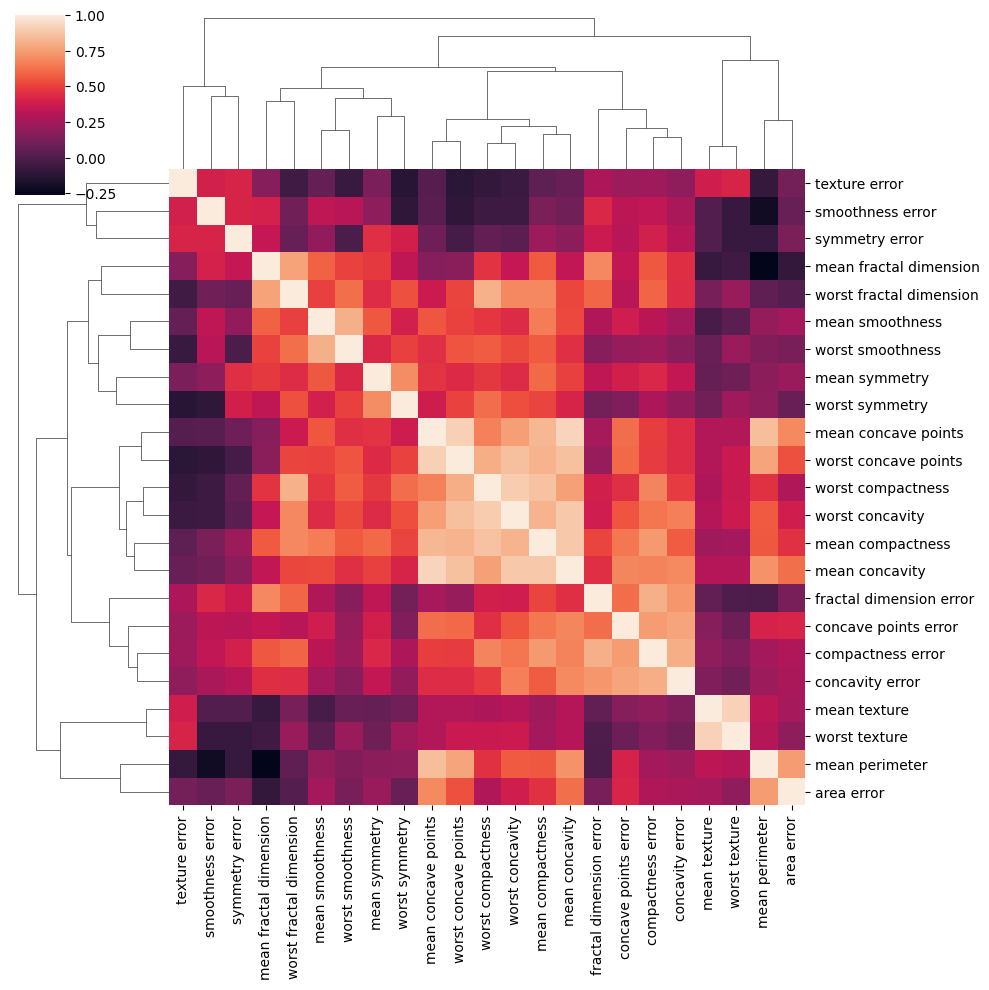

In [14]:
sns.clustermap(X_df.corr())

In [15]:





standardizer = StandardScaler()
regressor = Lasso(alpha=0.01)

In [16]:
X_df

,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,153.40,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,27.23,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,158.70,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,99.04,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,48.55,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,86.22,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
X_df_std = standardizer.fit_transform(X_df)
regressor.fit(X_df_std, y)
y_pred = regressor.predict(X_df_std)

In [18]:
regressor

Lasso(alpha=0.01)

In [19]:
regressor.coef_

array([-0.01477345, -0.14131279,  0.        ,  0.        , -0.        ,
       -0.05954178, -0.        ,  0.02478679, -0.        , -0.00573195,
       -0.0093975 ,  0.00786477,  0.00178519, -0.        , -0.        ,
        0.        , -0.06514459, -0.03698861, -0.        , -0.        ,
       -0.14527153, -0.04317229, -0.004475  ])

In [20]:
y_pred

array([-3.76768477e-02,  2.24715641e-01, -8.16447162e-02,  2.74653468e-02,
        2.95440452e-01,  4.23504616e-01,  1.82616571e-01,  4.52910551e-01,
        1.99516067e-01,  8.22048222e-02,  5.21582239e-01,  2.96894938e-01,
        2.01418173e-01,  5.26171565e-01,  2.10124671e-01,  1.66649685e-01,
        3.98039469e-01,  7.61163069e-02, -6.49842808e-02,  6.61979905e-01,
        8.61447899e-01,  1.14474582e+00,  2.05703989e-01, -4.83729108e-02,
        4.04072146e-02,  3.13111240e-03,  8.75018612e-04,  3.14597589e-01,
        5.87251457e-02,  4.79587416e-01, -1.55535615e-02,  4.60023520e-01,
        6.25885504e-02,  7.01661476e-02,  2.19002343e-01,  1.18764951e-01,
        4.13014141e-01,  1.00177124e+00,  9.32002195e-01,  3.50761368e-01,
        6.72545047e-01,  4.75587312e-01, -1.41860621e-01,  4.56412010e-01,
        4.22317694e-01,  1.81575455e-02,  1.16589759e+00,  2.61201250e-01,
        8.95933418e-01,  5.91526797e-01,  1.00800697e+00,  8.74141447e-01,
        9.67862871e-01,  

In [21]:
result = lasso_path(X_df,y)

In [22]:
result

(array([48.98579965, 45.6843207 , 42.60535039, 39.73389237, 37.05596101,
        34.55851326, 32.22938513, 30.05723244, 28.03147557, 26.14224793,
        24.38034792, 22.73719407, 21.20478328, 19.77565186, 18.44283911,
        17.19985348, 16.04064092, 14.95955541, 13.95133144, 13.0110584 ,
        12.13415661, 11.31635507, 10.55367061,  9.84238853,  9.17904449,
         8.56040761,  7.98346479,  7.44540598,  6.94361054,  6.47563442,
         6.03919834,  5.63217658,  5.25258673,  4.89857996,  4.56843207,
         4.26053504,  3.97338924,  3.7055961 ,  3.45585133,  3.22293851,
         3.00572324,  2.80314756,  2.61422479,  2.43803479,  2.27371941,
         2.12047833,  1.97756519,  1.84428391,  1.71998535,  1.60406409,
         1.49595554,  1.39513314,  1.30110584,  1.21341566,  1.13163551,
         1.05536706,  0.98423885,  0.91790445,  0.85604076,  0.79834648,
         0.7445406 ,  0.69436105,  0.64756344,  0.60391983,  0.56321766,
         0.52525867,  0.489858  ,  0.45684321,  0.4

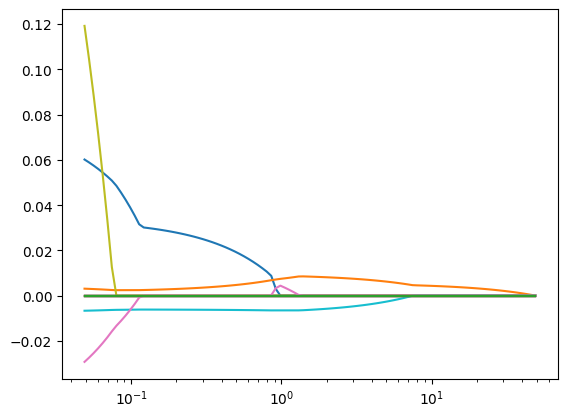

In [23]:
for i in range(result[1].shape[0]):
    plt.plot(result[0],result[1][i,:], label=X_df.columns[i])

plt.xscale('log')
plt.show()
# plt.xlabel


In [24]:
result_df = pd.DataFrame(data=result[1].T, columns=X_df.columns)
result_df

,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000365,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000705,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.001023,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.001319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.054383,0.002698,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.053209,-0.006471,...,-0.0,0.0,0.0,-0.020947,0.0,-0.0,-0.0,-0.0,0.0,0.0
96,0.055976,0.002800,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.071470,-0.006529,...,-0.0,0.0,0.0,-0.023255,0.0,-0.0,-0.0,-0.0,0.0,0.0
97,0.057461,0.002895,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.088501,-0.006584,...,-0.0,0.0,0.0,-0.025407,0.0,-0.0,-0.0,-0.0,0.0,0.0
98,0.058845,0.002984,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.104383,-0.006635,...,-0.0,0.0,0.0,-0.027413,0.0,-0.0,-0.0,-0.0,0.0,0.0


In [25]:
# Sk learn fit lasso regressors
# Sklearn for machine learning

# machine learning exa

In [26]:
predictor_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('randomforest',RandomForestClassifier())
])


In [27]:
predictor_pipeline.fit(X_df,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest', RandomForestClassifier())])

In [28]:
y_pred = predictor_pipeline.predict(X_df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
result = roc_auc_score(y, y_pred)

In [31]:
result

np.float64(1.0)

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X_df, y, test_size=0.2)

In [39]:
predictor_pipeline.fit(train_X,train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest', RandomForestClassifier())])

In [43]:
test_y_pred = predictor_pipeline.predict(test_X)

In [44]:
roc_auc_score(test_y, test_y_pred)

np.float64(0.9139659204811226)

In [45]:
result = roc_curve(test_y, test_y_pred)

(0.0, 1.0)

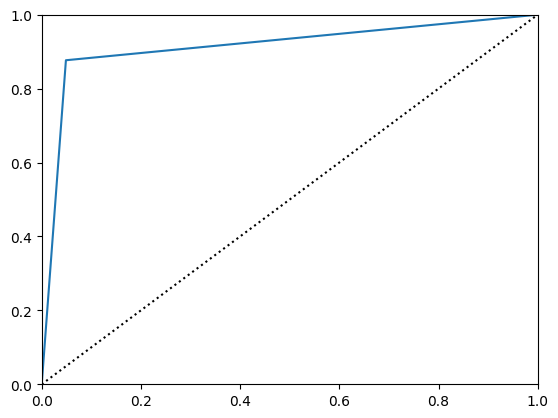

In [50]:
plt.plot(result[0],result[1])
plt.plot([0,1],[0,1],'k',linestyle=':')
plt.xlim([0,1])
plt.ylim([0,1])

In [59]:
# cross validation

result = cross_val_score(predictor_pipeline, X_df,y,scoring="roc_auc", cv=10)

In [60]:
result

array([0.99805195, 0.97792208, 0.99140212, 0.96825397, 1.        ,
       0.99404762, 0.98875661, 1.        , 0.9973545 , 1.        ])

In [ ]:
#
model.fit()
model.predict()

dim_reduction.fit()
dim_reduction.transform()
dim_reduction.fit_transform()